# Secure Data Science with Differential Privacy using Hagrid

### Data Owner 1 (DO1)
- lauch the domain node
- Create User Profile for DS
- create and publish the dataset

In [1]:

import syft as sy
import numpy as np
from syft.core.adp.entity import Entity
# if entity is not found -- change the jupyter kernel
# !jupyter kernelspec list

In [2]:
# Launch the PyGrid Domain Node with predefined username and password from cmd (bash)
#!hagrid launch domain

^C


In [3]:
domain_node = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to None... done! 	 Logging into angry_chollet... done!


In [6]:
# See all the users
domain_node.users

,id,email,name,budget,verify_key,role,added_by,website,institution,daa_pdf,created_at,budget_spent
0,1,info@openmined.org,Jane Doe,5.55,5fa02c47bdfa06e1f19ed1a957e88749ff2b17496db54d...,Owner,None,None,None,NaN,2022-03-20 12:40:12.595122,5.55
1,2,ds@stuba.sk,DS,100.00,9d23063e626d53e1c6360ff46dda813e2a9b00422ada36...,Data Scientist,Jane Doe,,,1.0,2022-03-20 12:42:49.943475,100.00


In [5]:
# Create a new user
domain_node.users.create(
    **{
        "name": "DS",
        "email": "ds@stuba.sk",
        "password": "ppdml",
        "budget": 100
    }
)

In [7]:
domain_node.requests

,Name,Email,Role,Request Type,Status,Reason,Request ID,Requested Object's ID,Requested Object's tags,Requested Budget,Current Budget
0,DS,ds@stuba.sk,Data Scientist,BUDGET,pending,I want to do data exploration,<UID: 6474032b30d24855b65893c73adc35dd>,None,[],1000.0,100.0


In [8]:
print(domain_node.requests[0].request_description)
domain_node.requests[0].accept()

I want to do data exploration


In [29]:
import pandas as pd
data = pd.read_csv("../../data/covid_countries/covid_dataset.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
1,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
2,1211,1378,2821,113,575,319,267,295,1167,52,...,577,231,655,449,224,600,224,577,492,1258
3,1238,1587,2356,107,520,265,296,316,1186,42,...,473,209,620,473,231,607,275,407,421,1109
4,1093,2075,2964,117,578,371,359,349,1151,48,...,550,227,648,447,232,563,188,338,432,1148


In [19]:
country0_data = data.iloc[:, 0].astype(np.int32)
country0_data

0     1140
1     1140
2     1211
3     1238
4     1093
5      966
6      758
7      858
8      877
9      925
10     629
11     806
12     895
13     818
14     735
15     661
16     629
17     632
18     622
19     589
20     604
21     527
22     498
23     483
24     478
25     519
26     471
27     472
28     482
29     367
30     376
31     336
32     267
33     328
34     416
35     456
36     434
37     363
38     379
39     375
40     322
41     321
42     235
43     275
44     257
45     267
46     255
47     256
48     258
49     233
50     298
51     322
52     390
53     451
Name: 0, dtype: int32

In [31]:
# Create a dataset
dataset = dict()
entities = []
for i in range(data.shape[-1]):
    country_name = f"Country {i}"

    # Create a new Entity correspoinding to the country and add it to the list
    new_entity = Entity(name=country_name)
    entities.append(new_entity)

    # Add it to the Dataset Dictionary
    single_country_data = data.iloc[:, i].astype(np.int32).to_numpy()
    min_val, max_val = int(single_country_data.min()-1), int(single_country_data.max()+1)
    dataset[country_name] = sy.Tensor(single_country_data).private(min_val=min_val,
                                                                   max_val=max_val,
                                                                   entities=new_entity)
dataset

{'Country 0': Tensor(child=SingleEntityPhiTensor(entity=Country 0, child=[1140 1140 1211 1238 1093  966  758  858  877  925  629  806  895  818
   735  661  629  632  622  589  604  527  498  483  478  519  471  472
   482  367  376  336  267  328  416  456  434  363  379  375  322  321
   235  275  257  267  255  256  258  233  298  322  390  451])),
 'Country 1': Tensor(child=SingleEntityPhiTensor(entity=Country 1, child=[ 1113  1113  1378  1587  2075  2269  2430  2709  2556  2765  3071  3147
   3740  3559  4470  3814  3665  4217  6409  6073  5948  5790  5565  6992
   7560  9143  8515  8535  9314 11850 13020 14235 13853 13833 12753 13324
  16070 15712 15150 15444 14844 15415 15880 16807 22958 27940 37563 37519
  41175 42582 38888 43746 46537 44942])),
 'Country 2': Tensor(child=SingleEntityPhiTensor(entity=Country 2, child=[3099 3099 2821 2356 2964 3390 3575 4260 4860 4145 5022 5101 5833 7090
  6549 5180 4548 4414 5078 6003 3024 3037 2936 2568 2056 1917 2455 2273
  2290 2488 2349 318

In [32]:
# Upload dataset to the Domain Node
domain_node.load_dataset(
    assets=dataset,
    name="COVID19 Cases in 175 countries",
    description="Weekly data for an entire year",
    metadata="Any metadata you'd like to include goes here"
)

Loading dataset... uploading... SUCCESS!                                                                                                                                      

Run <your client variable>.datasets to see your new dataset loaded into your machine!


In [36]:
domain_node.datasets

Idx,Name,Description,Assets,Id
[0],COVID19 Cases in 175 countries,Weekly data for an entire year,"[""Country 0""] -> Tensor[""Country 1""] -> Tensor[""Country 2""] -> Tensor...",c39e5695-2b8d-4217-9392-8d4a2f2b82b3


In [37]:
domain_node.requests

,Name,Email,Role,Request Type,Status,Reason,Request ID,Requested Object's ID,Requested Object's tags,Requested Budget,Current Budget
0,DS,ds@stuba.sk,Data Scientist,BUDGET,accepted,I want to do data exploration,<UID: 6474032b30d24855b65893c73adc35dd>,None,[],1000.0,100.0


(<AxesSubplot:>,
        0      1     2     3     4    5    6     7      8   9  ...  165  166  \
 0   1140   1113  3099    92   621  344  283   284   1095  44  ...  515  207   
 1   1140   1113  3099    92   621  344  283   284   1095  44  ...  515  207   
 2   1211   1378  2821   113   575  319  267   295   1167  52  ...  577  231   
 3   1238   1587  2356   107   520  265  296   316   1186  42  ...  473  209   
 4   1093   2075  2964   117   578  371  359   349   1151  48  ...  550  227   
 5    966   2269  3390   135   614  432  341   428   1107  49  ...  285  189   
 6    758   2430  3575   178   802  511  330   552   1046  43  ...  248  167   
 7    858   2709  4260   180   696  455  347   488   1014  42  ...  260  194   
 8    877   2556  4860   178   747  309  458   457   1000  46  ...  247  190   
 9    925   2765  4145   251   770  283  462   495   1131  46  ...  349  177   
 10   629   3071  5022   259   775  287  507   438   1207  62  ...  228  197   
 11   806   3147  5101 

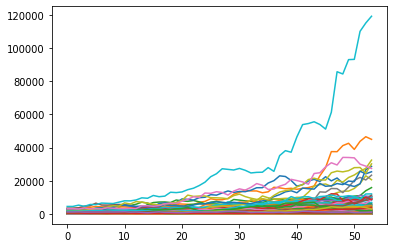

In [39]:
# import pandas as pd
data.plot(legend=False), data

<AxesSubplot:>

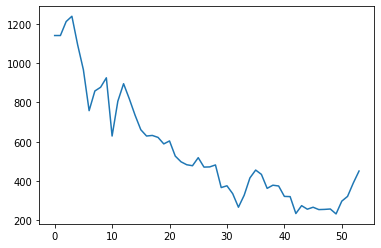

In [48]:
data.iloc[:, 0].plot() # plot

<AxesSubplot:>

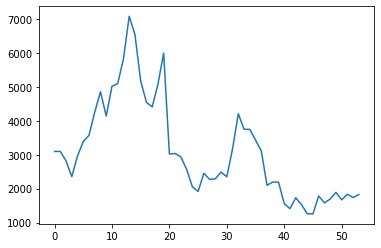

In [54]:
data.iloc[:, 2].plot()

In [49]:
import matplotlib, matplotlib.pyplot as plt
def plot_extrapolated_country(idx):
    x = list(range(54))
    y = data.iloc[:, idx].values

    plt.plot(y)

    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    new_y = []
    for x2 in new_points:
        new_y.append(f(54+x2))

    plt.plot(range(53, 65), new_y)

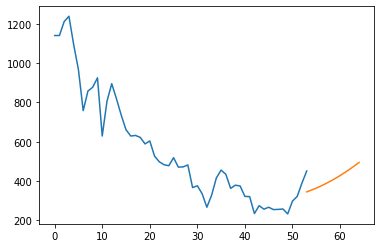

In [51]:
plot_extrapolated_country(0)

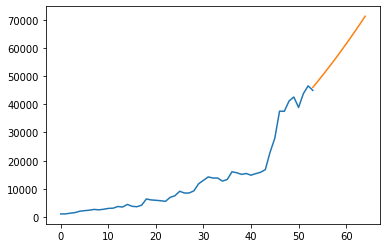

In [52]:
plot_extrapolated_country(1)

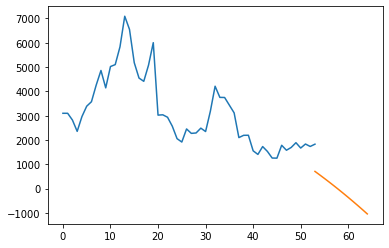

In [55]:
plot_extrapolated_country(2)